### Introduction

#### Importing necessary libraries

In [1]:
#Importing necessary libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import pandas as pd
import numpy as np
import os
import time
import sys

#Various sklearn libraries and utilities
from sklearn import linear_model
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, auc, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals import joblib

#Import categorical encoding library
import category_encoders as ce

#### Getting local directory and loading data

In [15]:
#Get current working directory
cwd = os.getcwd()
#Read energy simulation results
Results = pd.read_csv(cwd + "\\Energy_Results.csv")

In [16]:
Results.head(15)

,ClimateZone,Orientation,WWR,GlazingType,SHGC,OverhangLength,HVAC,HeatRecovery,Cooling,Heating,...,AverageMRT,MinMRT,MaxMRT,AverageRH,MinRH,MaxRH,PeakCoolingLoad,PeakHeatingLoad,CoolingSizing,HeatingSizing
0,1,Core,20,DP,0.2,0.5,11,1,311.812896,20.883695,...,24.005318,22.196365,24.608786,52.766281,11.492039,81.201879,549.9763,0.0,632.47274,0.0
1,1,Core,20,DP,0.2,0.5,11,2,300.340893,0.626567,...,24.005314,22.196309,24.608843,52.423143,12.634105,81.096689,549.9763,0.0,632.47274,0.0
2,1,Core,20,DP,0.2,0.5,16,0,721.700049,301.654383,...,24.274933,23.090055,25.423161,54.297460,12.561028,78.194042,549.9763,0.0,632.47274,0.0
3,1,Core,20,DP,0.2,0.5,16,1,710.907858,138.222897,...,24.274645,23.088821,25.422741,54.407838,12.591474,78.193935,549.9763,0.0,632.47274,0.0
4,1,Core,20,DP,0.2,0.5,16,2,694.776674,79.718053,...,24.274726,23.088366,25.423729,54.590228,13.629492,78.255193,549.9763,0.0,632.47274,0.0
5,1,Core,20,DP,0.2,0.5,7,0,919.376360,0.000000,...,17.411717,14.637412,23.332206,69.355310,17.879948,90.348070,549.9763,0.0,632.47274,0.0
6,1,Core,20,DP,0.2,0.5,7,1,899.720381,0.000000,...,17.425617,15.266702,23.332198,69.309020,16.979443,90.349372,549.9763,0.0,632.47274,0.0
7,1,Core,20,DP,0.2,0.5,7,2,822.046037,0.000000,...,17.426233,15.267430,23.332218,69.641164,18.439235,90.322280,549.9763,0.0,632.47274,0.0
8,1,Core,20,DP,0.2,0.0,11,0,315.211866,123.858828,...,24.005310,22.196367,24.608803,52.763304,11.492031,81.189012,549.9763,0.0,632.47274,0.0
9,1,Core,20,DP,0.2,0.0,11,1,311.812896,20.883695,...,24.005318,22.196365,24.608786,52.766281,11.492039,81.201879,549.9763,0.0,632.47274,0.0


### Data Preprocessing

#### Check unique values of categorical variables

In [17]:
#Check unique values of categorical variables
print(Results['Orientation'].unique())
print(Results['GlazingType'].unique())
print(Results['HVAC'].unique())

['Core' 'East' 'North' 'South' 'West']
['DP' 'TP']
[11 16  7]


#### Turn categorical variables to numeric labels

In [18]:
#Label encoding of categorical features

or_Label = LabelEncoder()
orientation_labels = or_Label.fit_transform(Results['Orientation'])
orientation_mapping = {index: label for index, label in enumerate(or_Label.classes_)}
print("Orientation label mapping:", orientation_mapping)
Results['Orientation'] = orientation_labels

glz_Label = LabelEncoder()
glazing_labels = glz_Label.fit_transform(Results['GlazingType'])
glz_mapping = {index: label for index, label in enumerate(glz_Label.classes_)}
print("Glazing Type label mapping:", glz_mapping)
Results['GlazingType'] = glazing_labels

hvac_Label = LabelEncoder()
hvac_labels = hvac_Label.fit_transform(Results['HVAC'])
hvac_mapping = {index: label for index, label in enumerate(hvac_Label.classes_)}
print("HVAC Type label mapping:", hvac_mapping)
Results['HVAC'] = hvac_labels

Orientation label mapping: {0: 'Core', 1: 'East', 2: 'North', 3: 'South', 4: 'West'}
Glazing Type label mapping: {0: 'DP', 1: 'TP'}
HVAC Type label mapping: {0: 7, 1: 11, 2: 16}


In [19]:
Results = Results.iloc[:,:13]
Results.head()

,ClimateZone,Orientation,WWR,GlazingType,SHGC,OverhangLength,HVAC,HeatRecovery,Cooling,Heating,Lighting,Fans,Pumps
0,1,0,20,0,0.2,0.5,1,1,311.812896,20.883695,612.913717,58.941109,92.912378
1,1,0,20,0,0.2,0.5,1,2,300.340893,0.626567,612.913717,58.863011,92.166292
2,1,0,20,0,0.2,0.5,2,0,721.700049,301.654383,612.913717,267.528228,46.442213
3,1,0,20,0,0.2,0.5,2,1,710.907858,138.222897,612.913717,267.528228,34.807325
4,1,0,20,0,0.2,0.5,2,2,694.776674,79.718053,612.913717,267.528228,28.000885


#### Encode all categorical variables using Category Encoders

In [22]:
#Encoding with category_encoders library

#Feature variables
X = Results.iloc[:, :8]

#Target variable
y = (Results.iloc[:, 8] + Results.iloc[:, 9] + Results.iloc[:, 10] + Results.iloc[:, 11] + 
     Results.iloc[:, 12])

#Binary encoding
binary = ce.BinaryEncoder(verbose=1, drop_invariant=True, 
                          cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_bin = binary.transform(X)

#Backward Difference encoding
backward = ce.BackwardDifferenceEncoder(verbose=1, drop_invariant=True, 
                                        cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_bd = backward.transform(X)

#Hashing encoding
hashing = ce.HashingEncoder(verbose=1, drop_invariant=True, 
                            cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_hash = hashing.transform(X)

#Helmert encoding
helmert = ce.HelmertEncoder(verbose=1, drop_invariant=True, 
                            cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_helmert = helmert.transform(X)

#One-hot-encoding
oneHot = ce.OneHotEncoder(verbose=1, drop_invariant=True, 
                          cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_onh = oneHot.transform(X)

#Ordinal encoding
ordinal = ce.OrdinalEncoder(verbose=1, drop_invariant=True, 
                            cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_ord = ordinal.transform(X)

#Leave one out encoding
lou = ce.LeaveOneOutEncoder(verbose=1, drop_invariant=True, 
                            cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_lou = lou.transform(X)

#Polynomial encoding
polynomial = ce.PolynomialEncoder(verbose=1, drop_invariant=True, 
                                  cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_poly = polynomial.transform(X)

#Sum encoding
sumenc = ce.SumEncoder(verbose=1, drop_invariant=True, 
                       cols=['ClimateZone', 'Orientation', 'GlazingType', 'HVAC', 'HeatRecovery']).fit(X, y)
Results_sum = sumenc.transform(X)

#### Save encoded data into a python dictionary for later use

In [23]:
#Save all encodings in a python dictionary
processed_data = {'binary': Results_bin, 'backward': Results_bd, 'hashing': Results_hash, 'helmert': Results_helmert, 
                  'oneHot': Results_onh, 'ordinal': Results_ord, 'lou': Results_lou, 'polynomial': Results_poly,
                  'sumenc': Results_sum}

#Save encodings to disk for later use, uncomment this if you are running for the first time
#np.save('Encoded_data.npy', processed_data)

#### Normalize target variable and generate binary classes

In [24]:
#Normalize consumption to room floor area and generate two classes
y_norm = y / 16

y_classes = np.empty((len(y_norm),1))

for i in range(0, len(y_norm)):
    if(y_norm[i] < np.percentile(y_norm, q=50)):
        y_classes[i] = 0
    else:
        y_classes[i] = 1

In [25]:
print(np.percentile(y_norm, q=50))
print(y_norm.max())

103.75782267597988
332.40208781570914


#### Helper function to plot learning curves

http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=8, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(15,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='accuracy', train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Linear Classifiers

#### Create placeholders for class probabilities and scores

In [27]:
#Create the class probabilities matrix, to use later for stacking
class0_prob = np.empty((36252, 14))
class1_prob = np.empty((36252, 14))

In [28]:
classifiers = ['Logistic Regression', 'Linear Discriminant Analysis', 'Linear SVC', 
               'Stochastic Gradient Descent', 'Quadratic Discriminant Analysis', 'RBF SVC', 'KNN', 
               'Gaussian Process', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Decision Tree', 
               'Extra Tree', 'Bagging', 'AdaBoost', 'GradientBoost']

scores = np.empty((len(classifiers), 1))

#### Logistic Regression

             precision    recall  f1-score   support

          0       0.81      0.83      0.82     18185
          1       0.83      0.81      0.82     18067

avg / total       0.82      0.82      0.82     36252



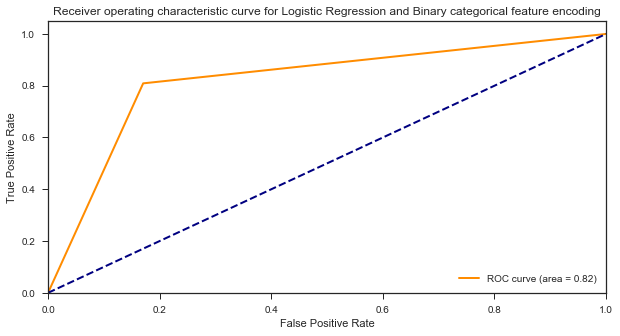

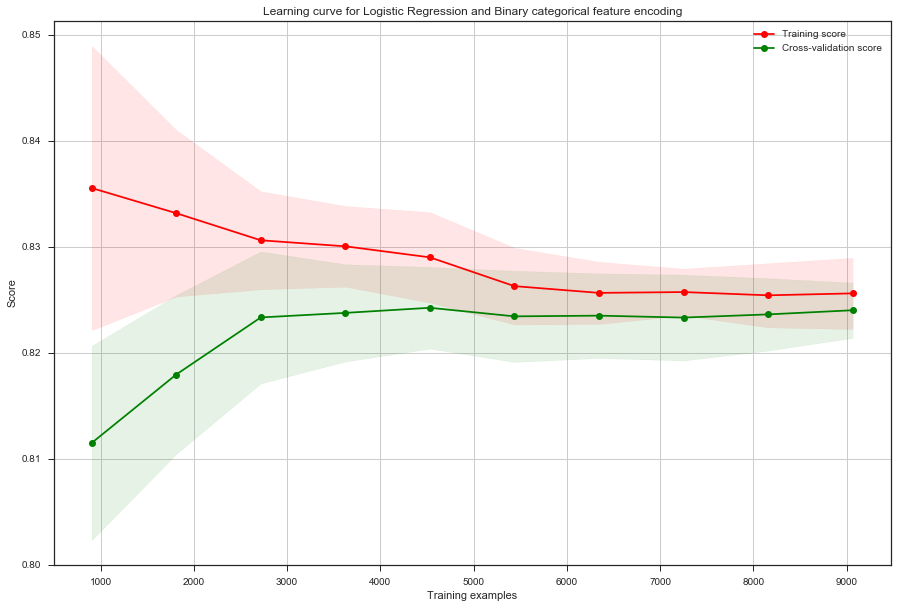

In [63]:
# Algorithm 1: Logistic Regression
logreg = linear_model.LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

linreg.fit(X_train,y_train)
y_pred_bin = linreg.predict(X_test)
y_pred_proba_bin = linreg.predict_proba(X_test)

class0_prob[:, 0] = y_pred_proba_bin[:,0]
class1_prob[:, 0] = y_pred_proba_bin[:,1]

scores[0] = linreg.score(X_test, y_test)
#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Logistic Regression and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(linreg, 'Learning curve for Logistic Regression and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_Logistic_Binary.png', dpi=200)

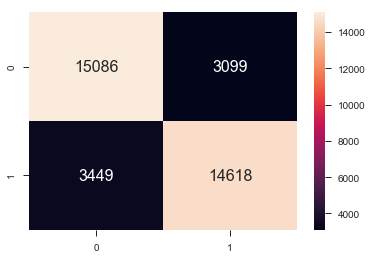

In [64]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Linear Discriminant Analysis (LDA)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82     18185
          1       0.83      0.81      0.82     18067

avg / total       0.82      0.82      0.82     36252



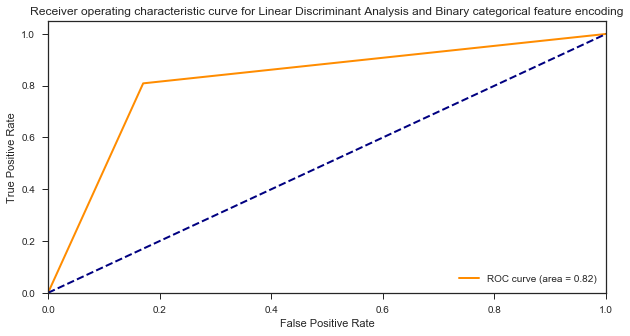

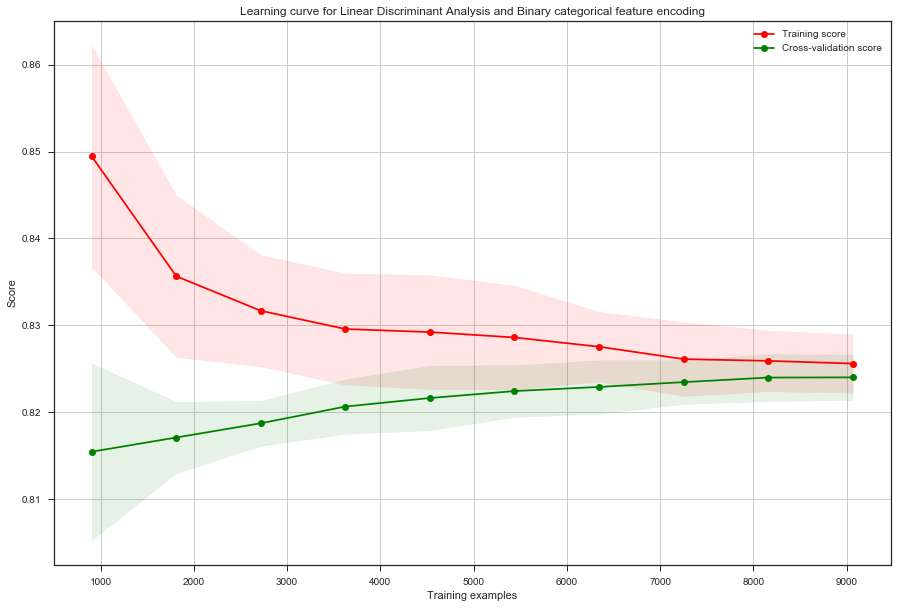

In [65]:
#Algorithm 2: Linear Discriminant analysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

linreg.fit(X_train,y_train)
y_pred_bin = linreg.predict(X_test)
y_pred_proba_bin = linreg.predict_proba(X_test)

class0_prob[:, 1] = y_pred_proba_bin[:,0]
class1_prob[:, 1] = y_pred_proba_bin[:,1]

scores[1] = linreg.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Linear Discriminant Analysis and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(linreg, 'Learning curve for Linear Discriminant Analysis and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_LDA_Binary.png', dpi=200)

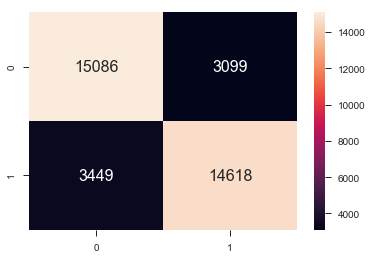

In [66]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Linear Support Vector Classifier (SVC)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82     18185
          1       0.83      0.81      0.82     18067

avg / total       0.82      0.82      0.82     36252



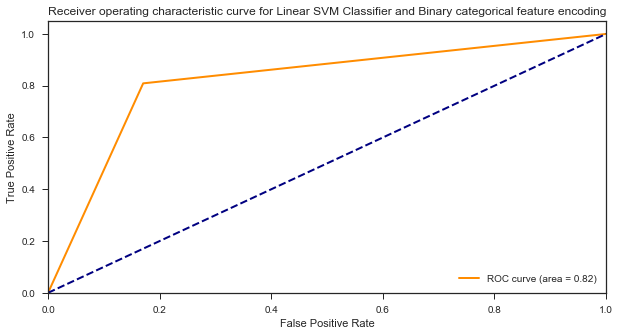

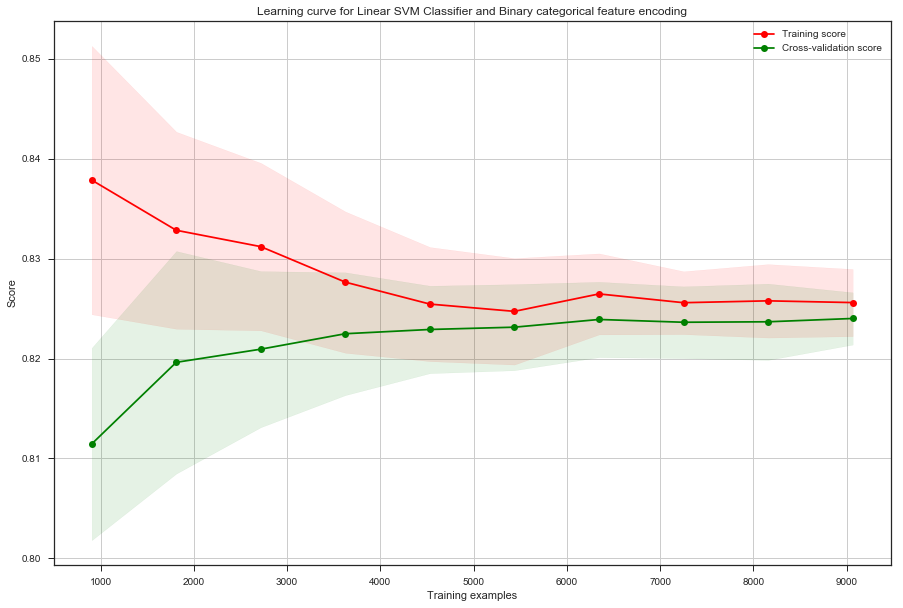

In [67]:
#Algorithm 3: Support Vector Machines / Linear SVC

linSVC = svm.LinearSVC(dual=False, tol=1e-5)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

linreg.fit(X_train,y_train)
y_pred_bin = linreg.predict(X_test)

scores[3] = linreg.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Linear SVM Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(linreg, 'Learning curve for Linear SVM Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_LinearSVC_Binary.png', dpi=200)

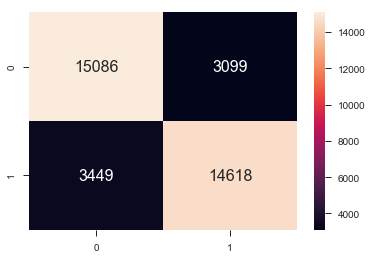

In [68]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Stochastic Gradient Descent (SDG) Classifier

             precision    recall  f1-score   support

          0       0.89      0.45      0.60     18185
          1       0.63      0.95      0.76     18067

avg / total       0.76      0.70      0.68     36252



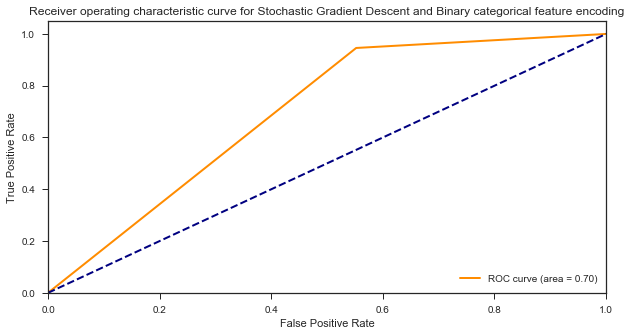

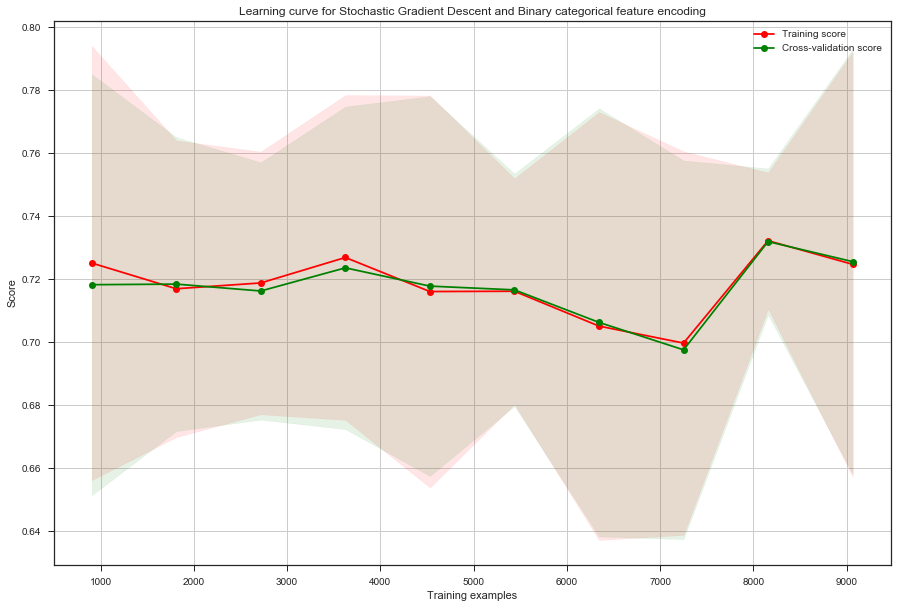

In [35]:
#Algorithm 4: Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=500, loss="log", penalty="elasticnet")

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

sgd.fit(X_train,y_train)
y_pred_bin = sgd.predict(X_test)
y_pred_proba_bin = sgd.predict_proba(X_test)

class0_prob[:, 4] = y_pred_proba_bin[:,0]
class1_prob[:, 4] = y_pred_proba_bin[:,1]

scores[5] = sgd.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Stochastic Gradient Descent and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(sgd, 'Learning curve for Stochastic Gradient Descent and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_SGD_Binary.png', dpi=200)

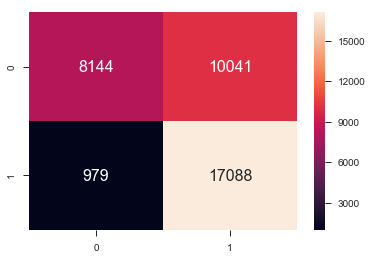

In [36]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

### Non Linear Classifiers

#### Quadratic Discriminant Analysis (QDA)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82     18185
          1       0.83      0.81      0.82     18067

avg / total       0.82      0.82      0.82     36252



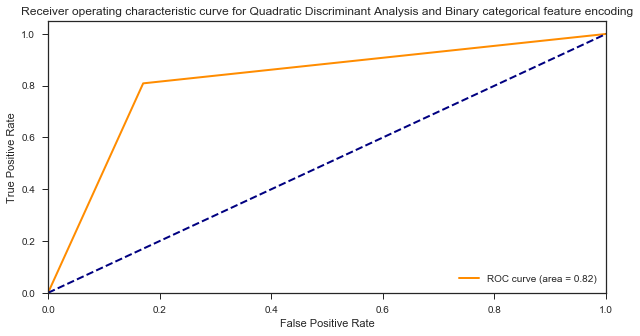

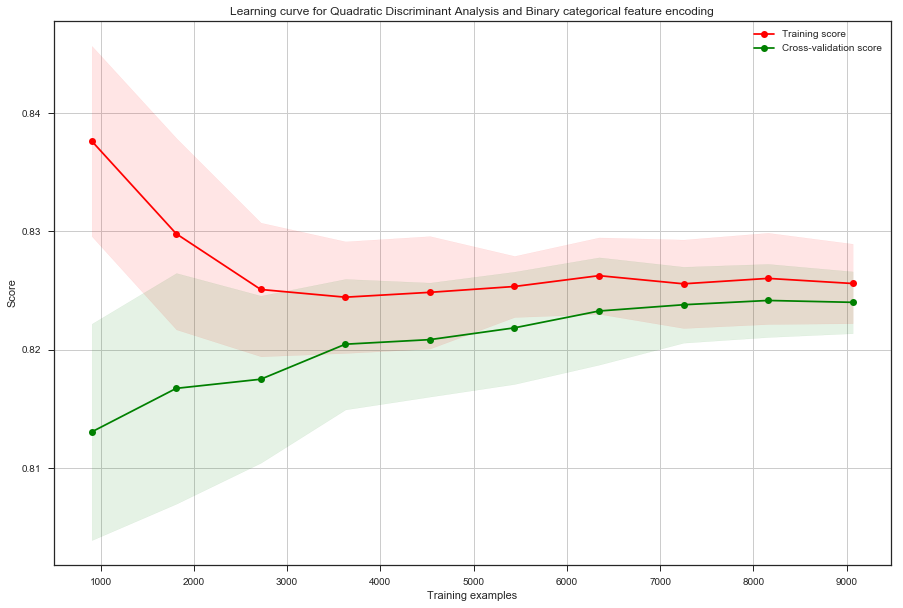

In [75]:
#Algorithm 5: Quadratic Discriminant analysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

linreg.fit(X_train,y_train)
y_pred_bin = linreg.predict(X_test)
y_pred_proba_bin = linreg.predict_proba(X_test)

class0_prob[:, 2] = y_pred_proba_bin[:,0]
class1_prob[:, 2] = y_pred_proba_bin[:,1]

scores[2] = linreg.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Quadratic Discriminant Analysis and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(linreg, 'Learning curve for Quadratic Discriminant Analysis and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_QDA_Binary.png', dpi=200)

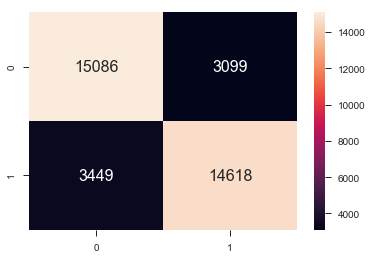

In [76]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Non-linear SVC

             precision    recall  f1-score   support

          0       0.83      0.83      0.83     18185
          1       0.83      0.83      0.83     18067

avg / total       0.83      0.83      0.83     36252



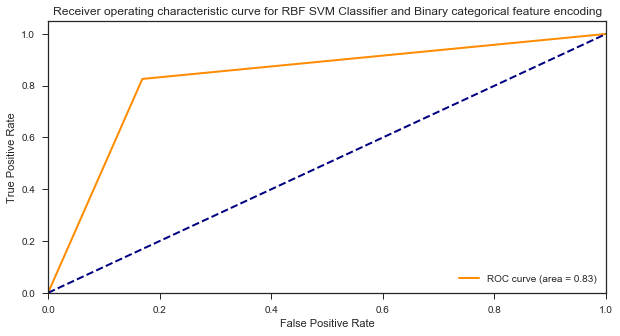

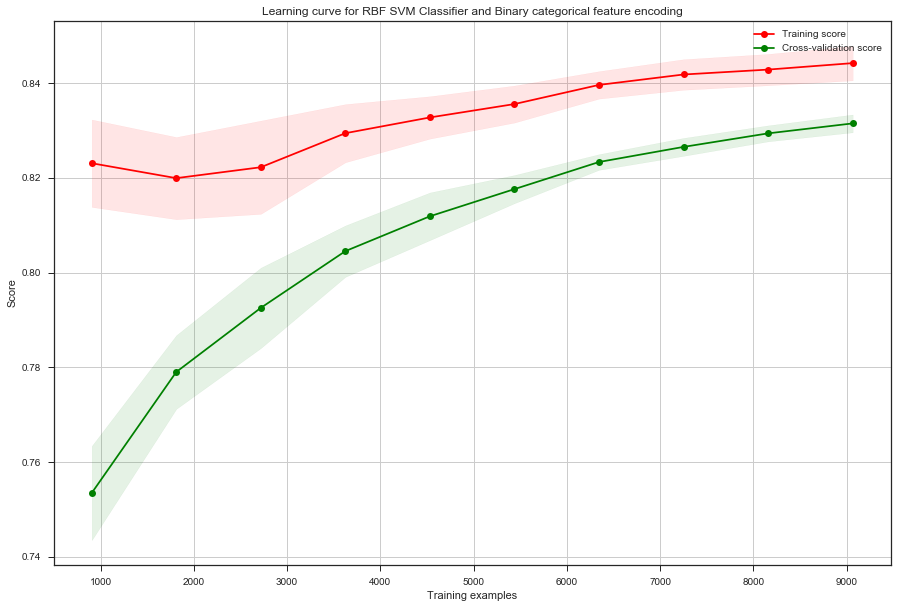

In [39]:
#Algorithm 6: Support Vector Machines / RBF Kernel SVC

svc = svm.SVC(probability=True)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

svc.fit(X_train,y_train)
y_pred_bin = svc.predict(X_test)
y_pred_proba_bin = svc.predict_proba(X_test)

class0_prob[:, 3] = y_pred_proba_bin[:,0]
class1_prob[:, 3] = y_pred_proba_bin[:,1]

scores[4] = svc.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for RBF SVM Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(svc, 'Learning curve for RBF SVM Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_SVC_Binary.png', dpi=200)

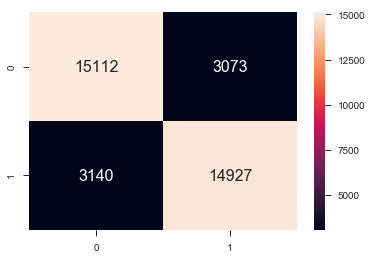

In [40]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### K Nearest Neighbours (KNN)

             precision    recall  f1-score   support

          0       0.90      0.90      0.90     18185
          1       0.90      0.90      0.90     18067

avg / total       0.90      0.90      0.90     36252



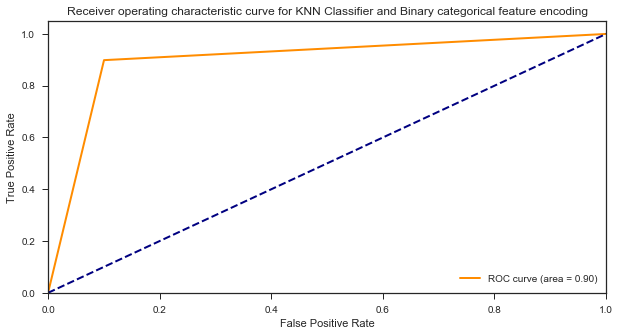

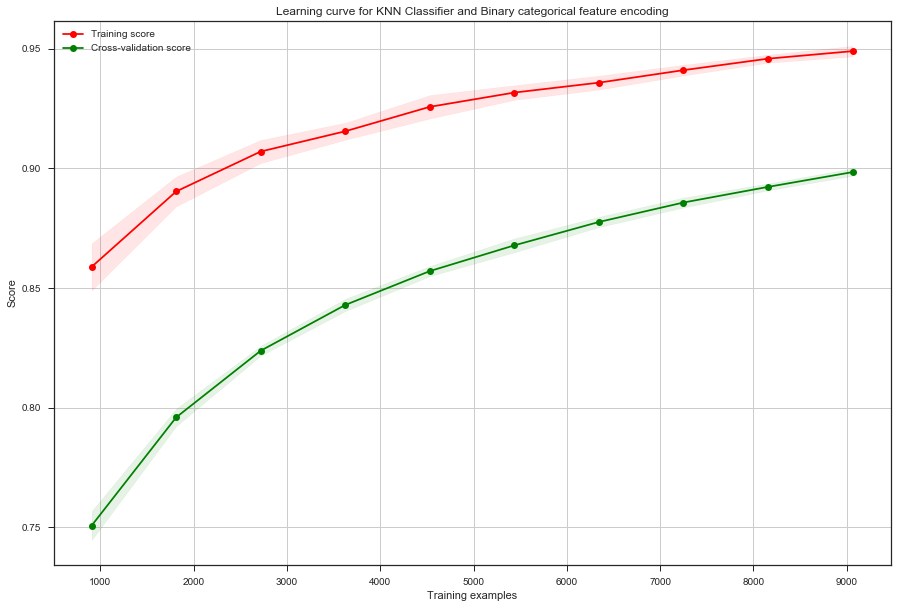

In [41]:
#Algorithm 7: Nearest Neighbours

KNN = neighbors.KNeighborsClassifier(n_neighbors=5, leaf_size=30)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

KNN.fit(X_train,y_train)
y_pred_bin = KNN.predict(X_test)
y_pred_proba_bin = KNN.predict_proba(X_test)

class0_prob[:, 5] = y_pred_proba_bin[:,0]
class1_prob[:, 5] = y_pred_proba_bin[:,1]

scores[6] = KNN.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for KNN Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(KNN, 'Learning curve for KNN Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_KNN_Binary.png', dpi=200)

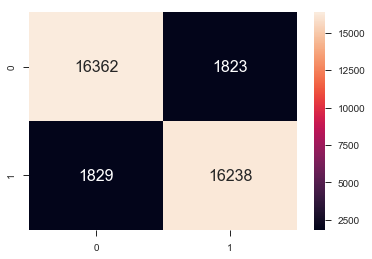

In [42]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Gaussian Process Classifier (GPC)

             precision    recall  f1-score   support

          0       0.90      0.89      0.90     18185
          1       0.89      0.90      0.90     18067

avg / total       0.90      0.90      0.90     36252



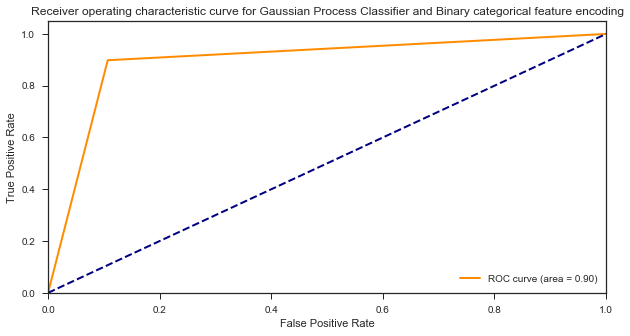

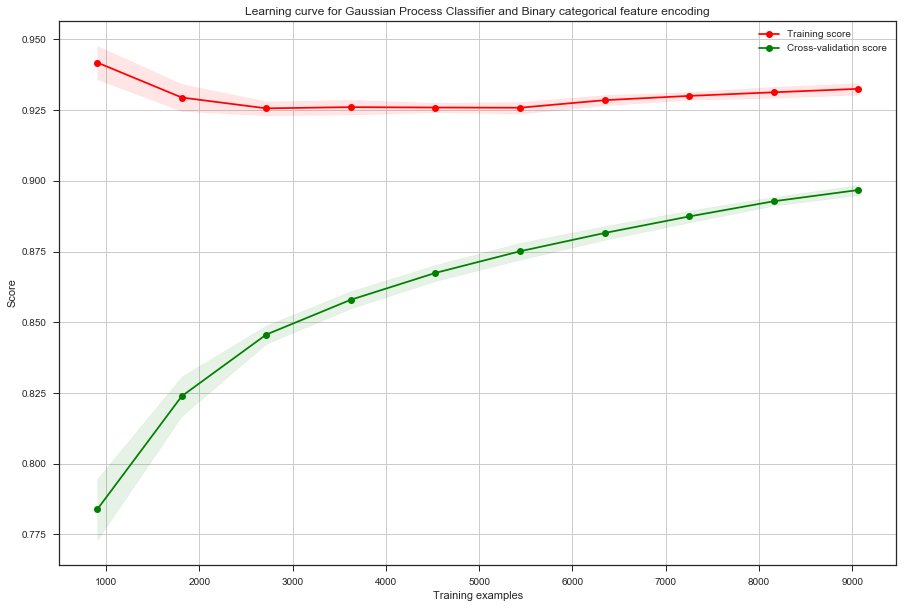

In [43]:
#Algorithm 8: Gaussian Process Classifier

gpc = GaussianProcessClassifier()

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

gpc.fit(X_train,y_train)
y_pred_bin = gpc.predict(X_test)
y_pred_proba_bin = gpc.predict_proba(X_test)

class0_prob[:, 6] = y_pred_proba_bin[:,0]
class1_prob[:, 6] = y_pred_proba_bin[:,1]

scores[7] = gpc.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Gaussian Process Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(gpc, 'Learning curve for Gaussian Process Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_GPC_Binary.png', dpi=200)

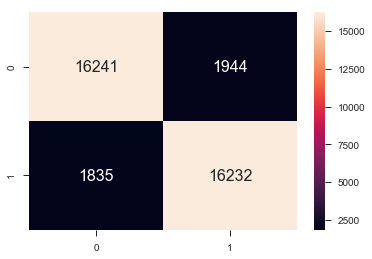

In [44]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Gaussian Naive Bayes

             precision    recall  f1-score   support

          0       0.74      0.77      0.75     18185
          1       0.76      0.73      0.74     18067

avg / total       0.75      0.75      0.75     36252



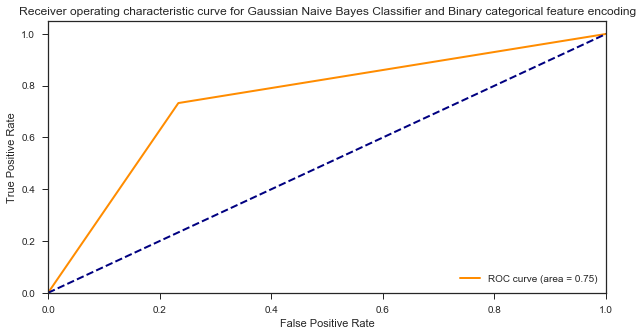

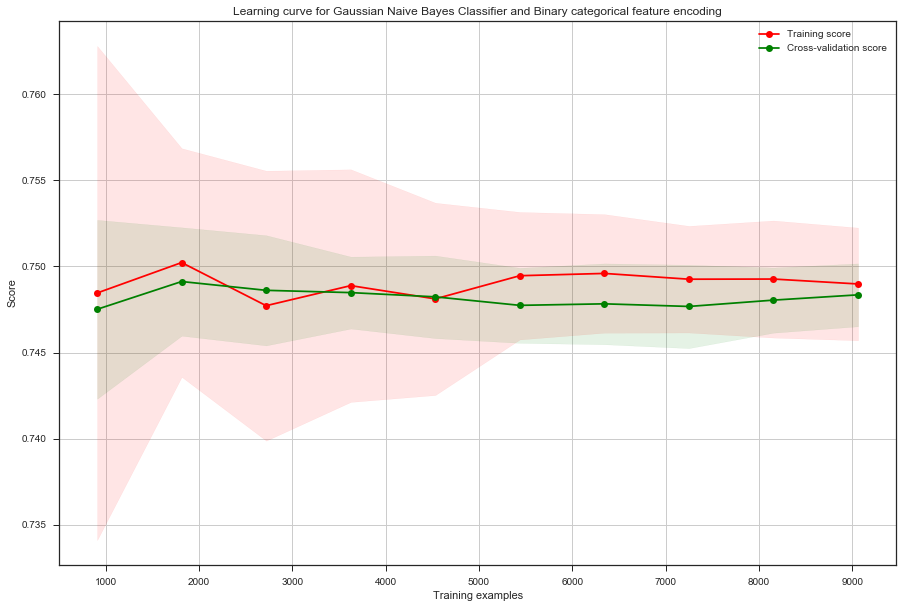

In [45]:
#Algorithm 9: Gaussian Naive Bayes

gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

gnb.fit(X_train,y_train)
y_pred_bin = gnb.predict(X_test)
y_pred_proba_bin = gnb.predict_proba(X_test)

class0_prob[:, 7] = y_pred_proba_bin[:,0]
class1_prob[:, 7] = y_pred_proba_bin[:,1]

scores[8] = gnb.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Gaussian Naive Bayes Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(gnb, 'Learning curve for Gaussian Naive Bayes Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_GNB_Binary.png', dpi=200)

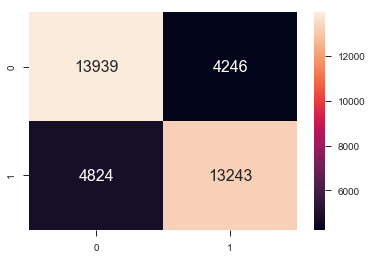

In [46]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Bernoulli Naive Bayes Classifier

             precision    recall  f1-score   support

          0       0.75      0.76      0.76     18185
          1       0.76      0.75      0.75     18067

avg / total       0.75      0.75      0.75     36252



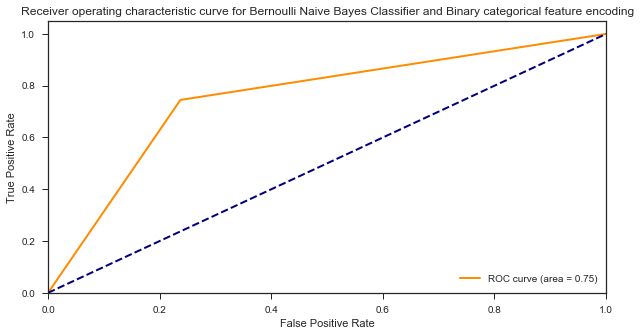

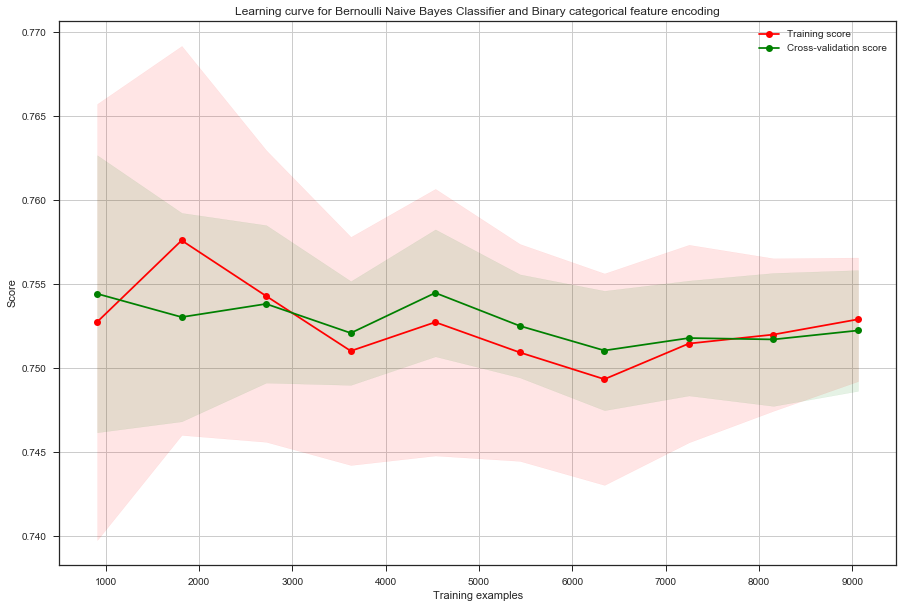

In [47]:
#Algorithm 10: Bernoulli Naive Bayes

bnb = BernoulliNB()


X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

bnb.fit(X_train,y_train)
y_pred_bin = bnb.predict(X_test)
y_pred_proba_bin = bnb.predict_proba(X_test)

class0_prob[:, 8] = y_pred_proba_bin[:,0]
class1_prob[:, 8] = y_pred_proba_bin[:,1]

scores[9] = bnb.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Bernoulli Naive Bayes Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(bnb, 'Learning curve for Bernoulli Naive Bayes Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_BNB_Binary.png', dpi=200)

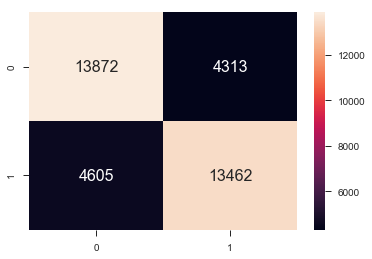

In [48]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Decision Tree Classifier

             precision    recall  f1-score   support

          0       0.95      0.94      0.95     18185
          1       0.94      0.95      0.95     18067

avg / total       0.95      0.95      0.95     36252



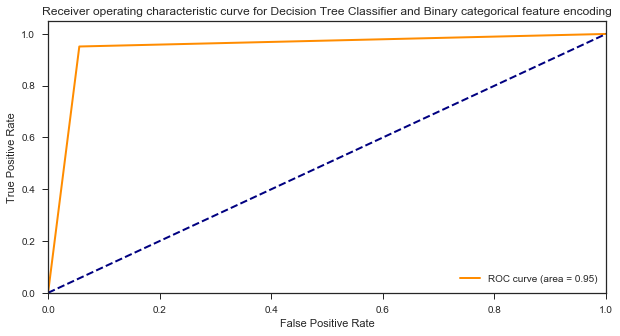

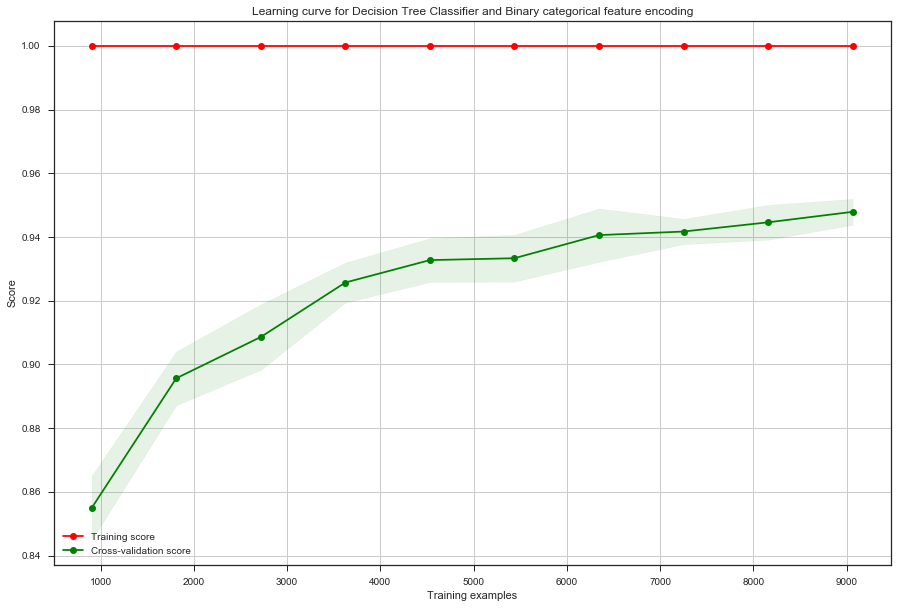

In [49]:
#Algorithm 11: Decision Trees Classifier

dtc = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

dtc.fit(X_train,y_train)
y_pred_bin = dtc.predict(X_test)
y_pred_proba_bin = dtc.predict_proba(X_test)

class0_prob[:, 9] = y_pred_proba_bin[:,0]
class1_prob[:, 9] = y_pred_proba_bin[:,1]

scores[10] = dtc.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Decision Tree Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(dtc, 'Learning curve for Decision Tree Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_DTC_Binary.png', dpi=200)

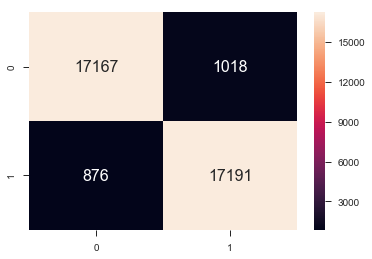

In [50]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Extra Trees Classifier

             precision    recall  f1-score   support

          0       0.91      0.90      0.90     18185
          1       0.90      0.91      0.91     18067

avg / total       0.90      0.90      0.90     36252



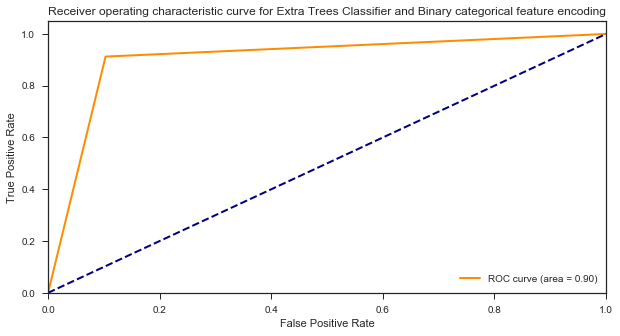

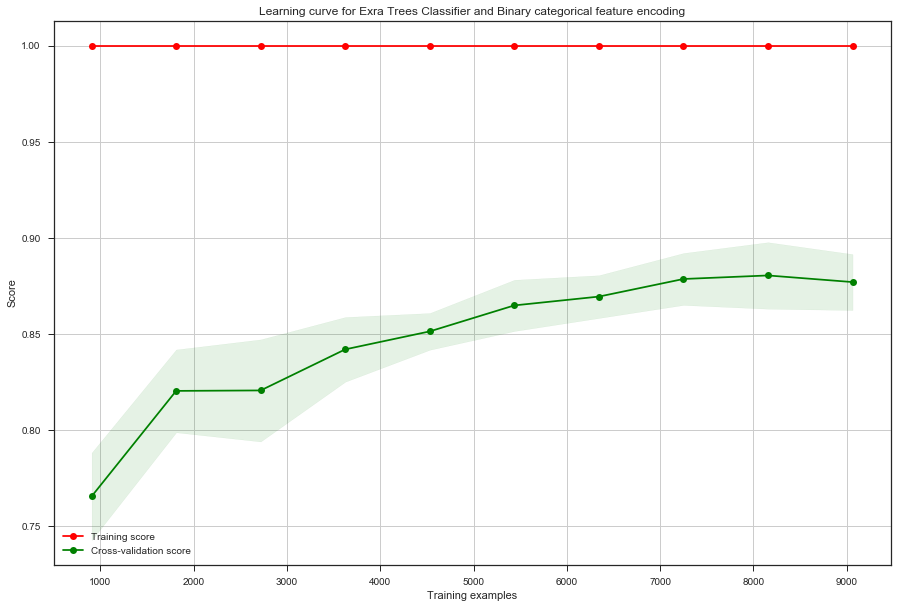

In [51]:
#Algorithm 12: Extra Trees Classifier

etc = tree.ExtraTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

etc.fit(X_train,y_train)
y_pred_bin = etc.predict(X_test)
y_pred_proba_bin = etc.predict_proba(X_test)

class0_prob[:, 10] = y_pred_proba_bin[:,0]
class1_prob[:, 10] = y_pred_proba_bin[:,1]

scores[11] = etc.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Extra Trees Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(etc, 'Learning curve for Exra Trees Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_ETC_Binary.png', dpi=200)

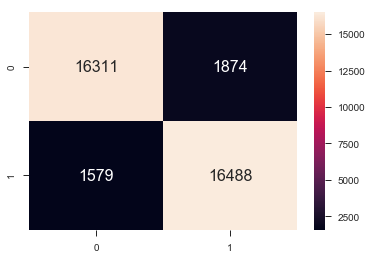

In [52]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Ensemble - Bagging Classifier (with KNN)

             precision    recall  f1-score   support

          0       0.89      0.91      0.90     18185
          1       0.91      0.89      0.90     18067

avg / total       0.90      0.90      0.90     36252



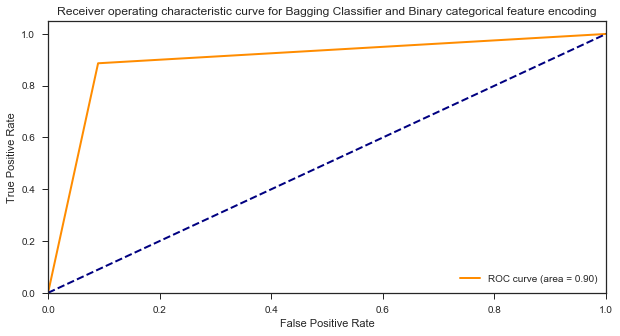

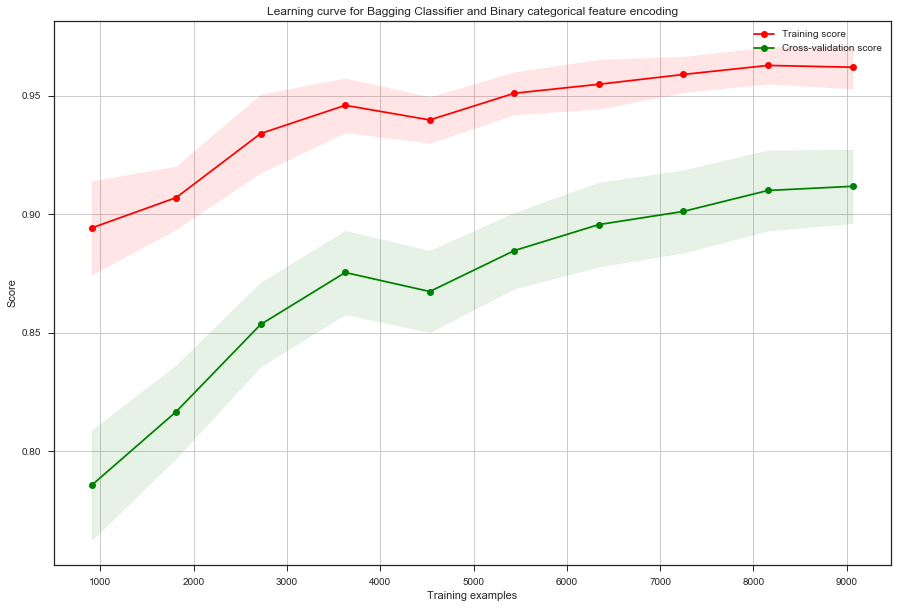

In [53]:
#Algorithm 13: Ensemble Methods / Bagging Classifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.9, 
                            max_features=0.9)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

bagging.fit(X_train,y_train)
y_pred_bin = bagging.predict(X_test)
y_pred_proba_bin = bagging.predict_proba(X_test)

class0_prob[:, 11] = y_pred_proba_bin[:,0]
class1_prob[:, 11] = y_pred_proba_bin[:,1]

scores[12] = bagging.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Bagging Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(bagging, 'Learning curve for Bagging Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_BC_Binary.png', dpi=200)

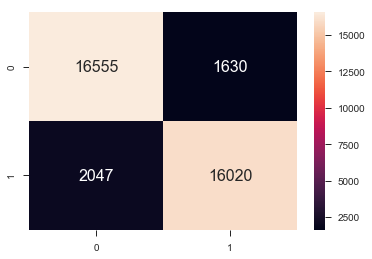

In [54]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Adaboost Classifier

             precision    recall  f1-score   support

          0       0.79      0.78      0.79     18185
          1       0.78      0.79      0.79     18067

avg / total       0.79      0.79      0.79     36252



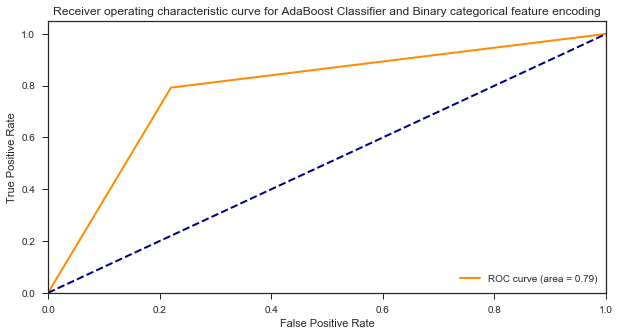

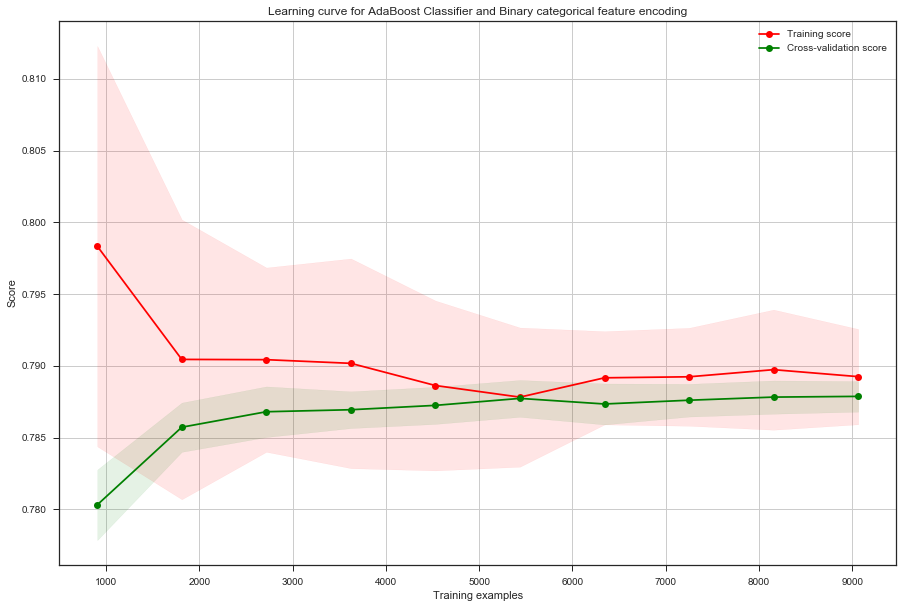

In [55]:
#Algorithm 14: Adaboost Classifier

adc = AdaBoostClassifier(n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

adc.fit(X_train,y_train)
y_pred_bin = adc.predict(X_test)
y_pred_proba_bin = adc.predict_proba(X_test)

class0_prob[:, 12] = y_pred_proba_bin[:,0]
class1_prob[:, 12] = y_pred_proba_bin[:,1]

scores[13] = adc.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for AdaBoost Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(adc, 'Learning curve for AdaBoost Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_ADC_Binary.png', dpi=200)

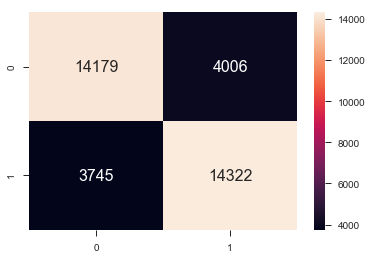

In [56]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

#### Gradient Tree Boosting Classifier 

             precision    recall  f1-score   support

          0       0.97      0.97      0.97     18185
          1       0.97      0.97      0.97     18067

avg / total       0.97      0.97      0.97     36252



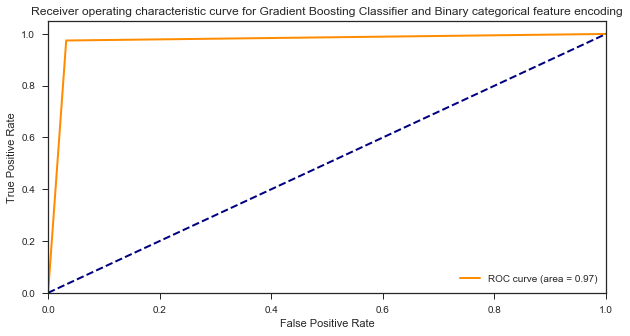

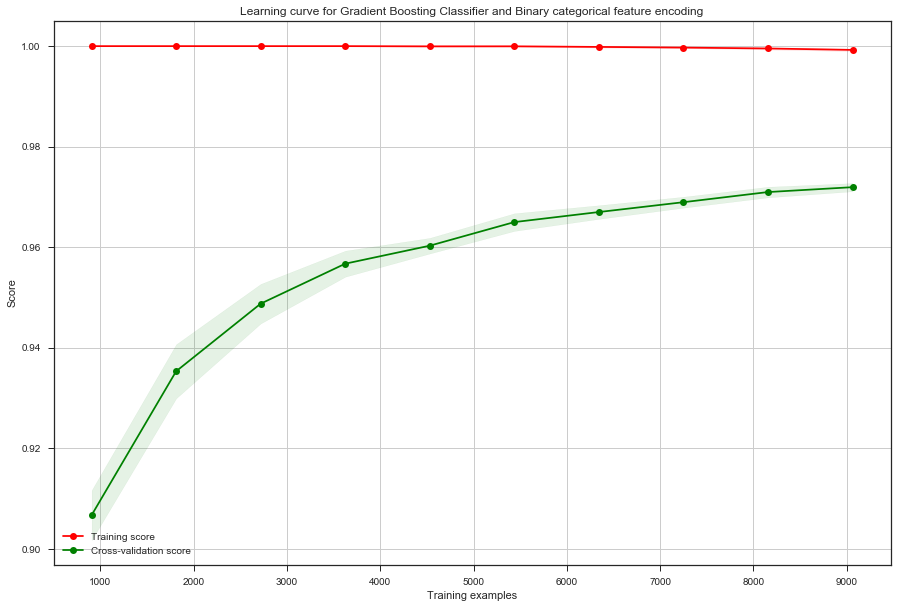

In [57]:
#Algorithm 15: Gradient Tree Boosting

gtb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=6)

X_train, X_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

gtb.fit(X_train,y_train)
y_pred_bin = gtb.predict(X_test)
y_pred_proba_bin = gtb.predict_proba(X_test)

class0_prob[:, 13] = y_pred_proba_bin[:,0]
class1_prob[:, 13] = y_pred_proba_bin[:,1]

scores[14] = gtb.score(X_test, y_test)

#Show classification report
print(classification_report(y_test, y_pred_bin, labels=(0,1)))

#Print ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for Gradient Boosting Classifier and Binary categorical feature encoding')
plt.legend(loc="lower right")
plt.savefig('ROC_Binary.png', dpi=200)
plt.show()

cv = ShuffleSplit(n_splits=10, test_size=0.8, random_state=1337)

#Print learning curve
plot_learning_curve(gtb, 'Learning curve for Gradient Boosting Classifier and Binary categorical feature encoding', 
                    Results_bin.values, y_classes, ylim=None, cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.savefig('LearningCurve_GTBC_Binary.png', dpi=200)

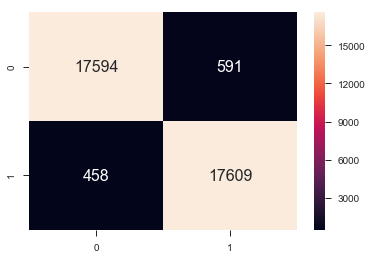

In [58]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, y_pred_bin)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()

### Visualize Model Performance

#### Plot model performance (accuracy score) for all classifier

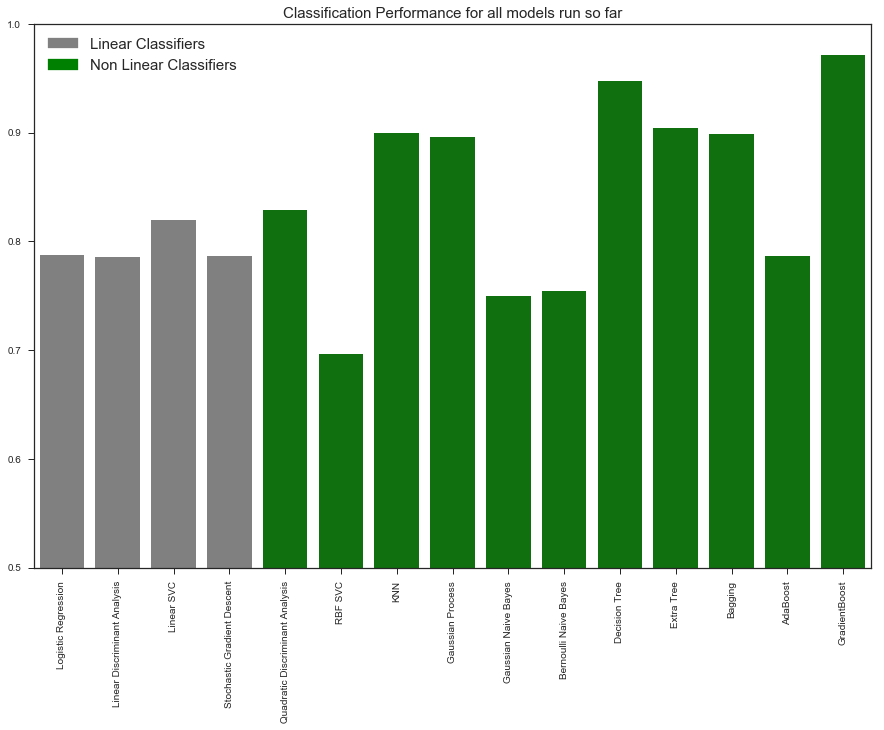

In [59]:
model_names = np.asarray(classifiers).reshape(1,-1)[0]
model_scores = scores.reshape(1,-1)[0]

grey_patch = mpatches.Patch(color='grey', label='Linear Classifiers')
green_patch = mpatches.Patch(color='green', label='Non Linear Classifiers')

colors = ['gray', 'gray', 'gray', 'gray', 'green', 'green', 'green', 'green', 'green', 'green', 'green',
          'green', 'green', 'green', 'green',]

plt.figure(figsize=(15,10))
sns.barplot(x=model_names.reshape(1,-1)[0], y=model_scores.reshape(1,-1)[0], order=model_names,
           palette=colors)
plt.xticks(rotation=90)
plt.ylim((0.5, 1))
plt.legend(handles=[grey_patch, green_patch], fontsize=15)
plt.title("Classification Performance for all models run so far", fontsize=15)
plt.savefig('Summary_Classifier_Performance.png', dpi=200)
plt.show()

In [216]:
#Execution times
time_req = [4.7, 4.58, 4.5, 14.5, 4.57, 205, 30.2, 1758, 5.99, 4.07, 3.82, 3.76, 235, 202, 144] 

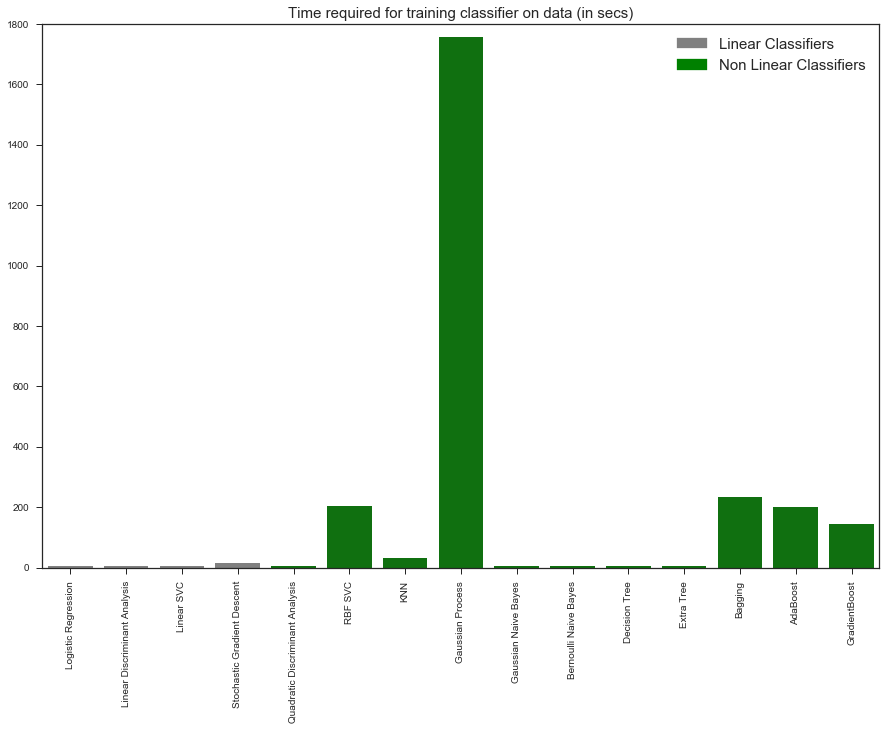

In [224]:
model_names = np.asarray(classifiers).reshape(1,-1)[0]
model_scores = scores.reshape(1,-1)[0]

grey_patch = mpatches.Patch(color='grey', label='Linear Classifiers')
green_patch = mpatches.Patch(color='green', label='Non Linear Classifiers')

colors = ['gray', 'gray', 'gray', 'gray', 'green', 'green', 'green', 'green', 'green', 'green', 'green',
          'green', 'green', 'green', 'green',]

plt.figure(figsize=(15,10))
sns.barplot(x=model_names.reshape(1,-1)[0], y=time_req, order=model_names,
           palette=colors)
plt.xticks(rotation=90)
plt.ylim((0, 1800))
plt.legend(handles=[grey_patch, green_patch], fontsize=15)
plt.title("Time required for training classifier on data (in secs)", fontsize=15)
plt.savefig('TimeRequired_Classifier_Performance.png', dpi=200)
plt.show()

In [222]:
classifiers_ed = ['Logistic Regression',
 'Linear Discriminant Analysis',
 'Linear SVC',
 'Stochastic Gradient Descent',
 'Quadratic Discriminant Analysis',
 'RBF SVC',
 'KNN',
 'Gaussian Naive Bayes',
 'Bernoulli Naive Bayes',
 'Decision Tree',
 'Extra Tree',
 'Bagging',
 'AdaBoost',
 'GradientBoost']

time_req_ed = [4.7, 4.58, 4.5, 14.5, 4.57, 205, 30.2, 5.99, 4.07, 3.82, 3.76, 235, 202, 144] 

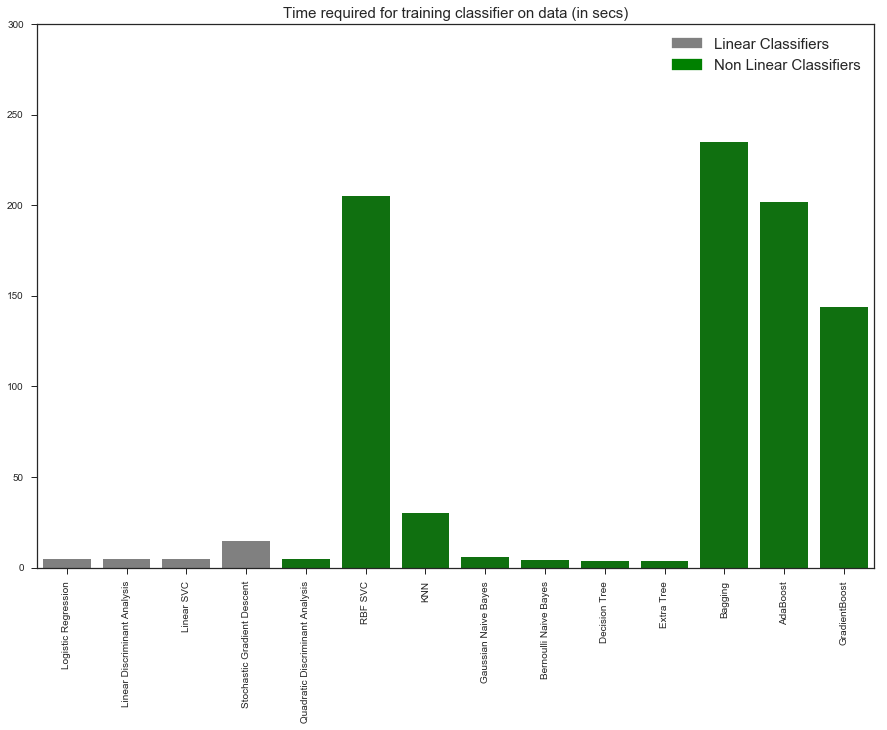

In [225]:
model_names = np.asarray(classifiers_ed).reshape(1,-1)[0]
model_scores = scores.reshape(1,-1)[0]

grey_patch = mpatches.Patch(color='grey', label='Linear Classifiers')
green_patch = mpatches.Patch(color='green', label='Non Linear Classifiers')

colors = ['gray', 'gray', 'gray', 'gray', 'green', 'green', 'green', 'green', 'green', 'green', 'green',
          'green', 'green', 'green', 'green',]

plt.figure(figsize=(15,10))
sns.barplot(x=model_names.reshape(1,-1)[0], y=time_req_ed, order=model_names,
           palette=colors)
plt.xticks(rotation=90)
plt.ylim((0, 300))
plt.legend(handles=[grey_patch, green_patch], fontsize=15)
plt.title("Time required for training classifier on data (in secs)", fontsize=15)
plt.savefig('TimeRequired_Classifier_Performance2.png', dpi=200)
plt.show()

### Model Ensembling: Improving performance by stacking classifiers

Code taken and adapted from: https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/code

#### Python function to generate out-of-fold predictions

The idea here is to limit the amount of samples the model 'sees' at each iteration. This will help with avoiding overfitting, which happens when the model encounters test samples while training.

In [161]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

#### A helper python class

In [164]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = x_train.shape[0]
ntest = x_test.shape[0]
SEED = 42 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

#### Train classifiers and make out-of-fold predictions

In [188]:
#Create trainging and test sets
x_train, x_test, y_train, y_test = train_test_split(Results_bin, y_classes, test_size=0.8, random_state=1337)
y_train = y_train.ravel().astype('int')
y_test = y_test.ravel().astype('int')

In [189]:
# Create our OOF train and test predictions. These base results will be used as new features
dtc_oof_train, dtc_oof_test = get_oof(dtc,x_train.reset_index(drop=True), y_train, x_test.reset_index(drop=True)) # Decision Trees
etc_oof_train, etc_oof_test = get_oof(etc,x_train.reset_index(drop=True), y_train, x_test.reset_index(drop=True)) # Extra Trees
adc_oof_train, adc_oof_test = get_oof(adc,x_train.reset_index(drop=True), y_train, x_test.reset_index(drop=True)) # Adaboost
gtb_oof_train, gtb_oof_test = get_oof(gtb,x_train.reset_index(drop=True), y_train, x_test.reset_index(drop=True)) # Gradient Booster
print("Training is complete")

Training is complete


#### Extract feature importances from classifiers

In [190]:
dtc_features = dtc.feature_importances_
etc_features = etc.feature_importances_
adc_features = adc.feature_importances_
gtb_features = gtb.feature_importances_

#### Create a dataframe with all feature importances from each classifier

In [191]:
cols = x_train.columns.values
# Create a dataframe with featuress
feature_dataframe = pd.DataFrame( {'features': cols,
     'Decision Trees features importances': dtc_features,                              
     'Extra Trees features importances': etc_features,                          
     'AdaBoost features importances': adc_features,
     'Gradient Boost features importances': gtb_features
    })

#### Interactive feature importances using Plotly

In [192]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [193]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Decision Trees features importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Decision Trees features importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Decision Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees features importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees features importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost features importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost features importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost features importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost features importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

#### Generate average feature importance plot

In [194]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost features importances,Decision Trees features importances,Extra Trees features importances,Gradient Boost features importances,features,mean
0,0.034,0.137644,0.090745,0.146829,ClimateZone_0,0.102304
1,0.018,0.106416,0.110433,0.113370,ClimateZone_1,0.087055
2,0.027,0.128327,0.083324,0.119410,ClimateZone_2,0.089515


In [195]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

#### Second-level predictions from First-level outputs

We now use the first set of predictions from the classifier to generate a new, second-level dataset on which we train another classifier

In [196]:
base_predictions_train = pd.DataFrame( {'Decision Trees': dtc_oof_train.ravel(),
     'ExtraTrees': etc_oof_train.ravel(),
     'AdaBoost': adc_oof_train.ravel(),
      'GradientBoost': gtb_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,Decision Trees,ExtraTrees,GradientBoost
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


#### Correlation of second-level training set

Usually getting uncorrelated models helps with accuracy of the stacked classifier

In [197]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [198]:
x_train = np.concatenate(( dtc_oof_train, etc_oof_train, adc_oof_train, gtb_oof_train), axis=1)
x_test = np.concatenate(( dtc_oof_test, etc_oof_test, adc_oof_test, gtb_oof_test), axis=1)

#### Second level learning model (XGBoost)

In [202]:
import lightgbm as lgbm

In [214]:
gbm = lgbm.LGBMClassifier(
    learning_rate = 0.02,
    n_estimators= 500,
    max_depth= 6,
    min_child_weight= 0.002,
    colsample_bytree=0.9,
    objective= 'binary',
    nthread= -1,)

gbm.fit(x_train, y_train)
predictions = gbm.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



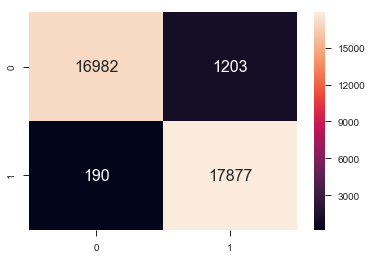

In [215]:
#Create our confusion matrix [object]
cm = confusion_matrix(y_test, predictions)

#Plot confusion matrix to visualise performance
sns.heatmap(cm, fmt='d', annot=True,annot_kws={"size": 16})# font size
plt.show()